# ANN and Deep Learning with tensorflow-keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style(style='darkgrid')

In [4]:
df_test = pd.read_csv("https://github.com/dsindy/kaggle-titanic/blob/master/data/test.csv?raw=true")

In [5]:
df_train = pd.read_csv("https://github.com/dsindy/kaggle-titanic/blob/master/data/train.csv?raw=true")

In [6]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train = df_train.set_index('PassengerId')

In [8]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
df_train.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:ylabel='PassengerId'>

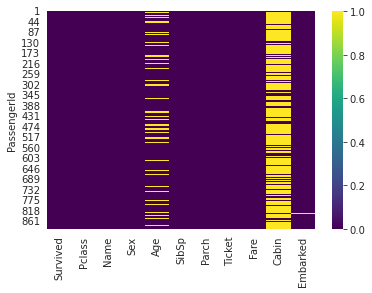

In [12]:
sns.heatmap(df_train.isna(), cmap='viridis')

## Sigmoid function

In [13]:
x = np.arange(-100, 100, 1)
y = 1/(1+np.exp(-x))

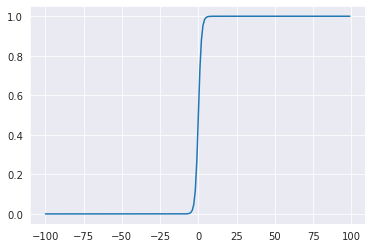

In [14]:
plt.plot(x, y)
plt.show()

## Metrics for classification problem

|                   | Predicted Covid+ | Predicted Covid- |
|-------------------|---------------|-------------------|
| **Actual Covid+**    | TP            | FN                |
| **Actual Covid-**| FP            | TN                |

| Total = 10       | Predicted Covid+ | Predicted Covid- |
|-------------------|---------------|-------------------|
| **Actual Covid+** | 5            | 1                |
| **Actual Covid-** | 1            | 3                |

$Accuracy = \frac{TP + TN}{\text{Total Instances}}$ = (Total cases correctly tested)

$Recall = \frac{TP}{TP + FN}$ = (How many of the actual positive cases have been tested correctly)

$Precision = \frac{TP}{TP + FP}$ = (Out of the reported positive cases, how many of them are actually Covid+)

## Exploratory Data Analysis

<AxesSubplot:ylabel='PassengerId'>

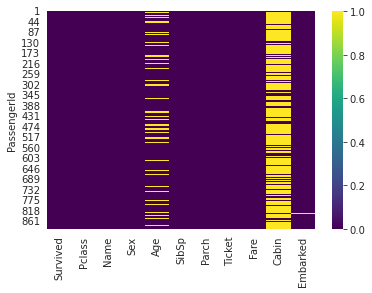

In [15]:
sns.heatmap(df_train.isnull(), cmap='viridis')

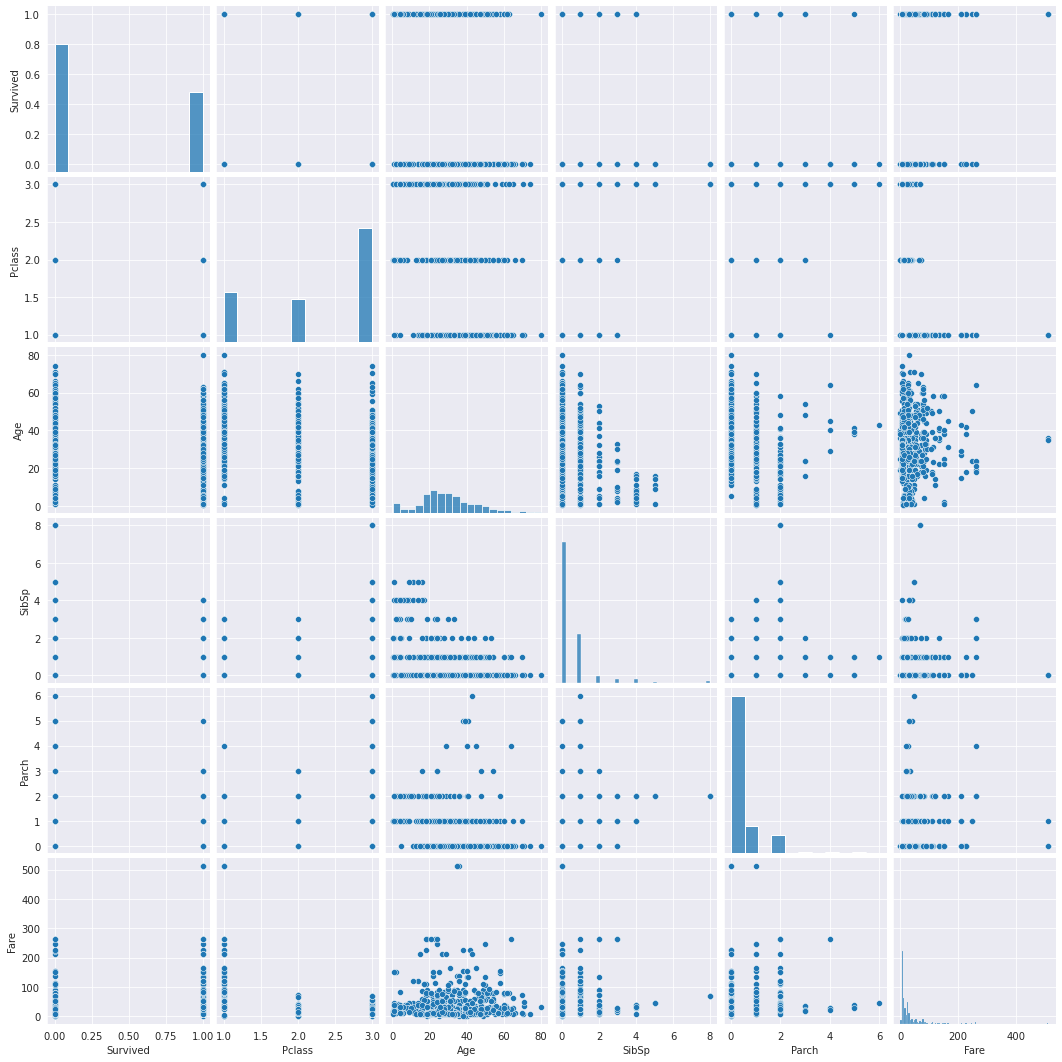

In [16]:
sns.pairplot(df_train)

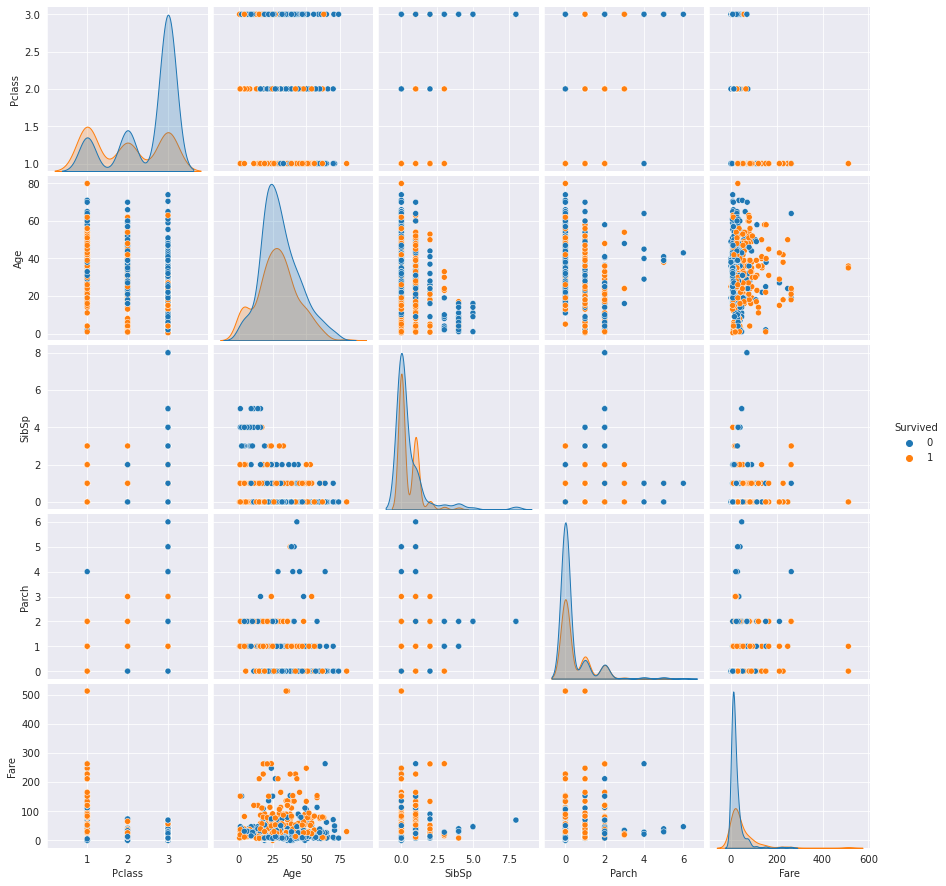

In [17]:
sns.pairplot(df_train, hue='Survived')

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [19]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

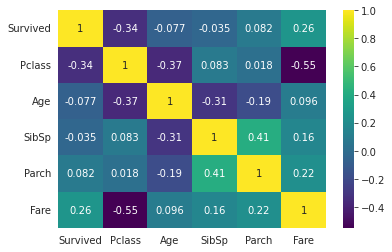

In [20]:
cor = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).corr()
sns.heatmap(cor, cmap='viridis', annot=True)

<AxesSubplot:xlabel='Survived', ylabel='Count'>

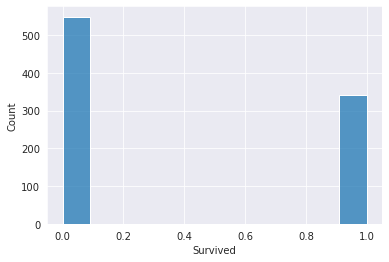

In [21]:
sns.histplot(data=df_train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

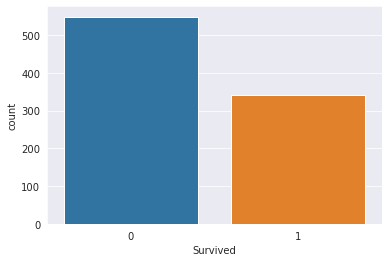

In [22]:
sns.countplot(data=df_train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

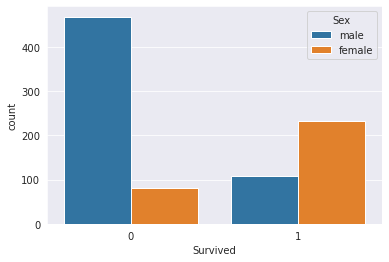

In [23]:
sns.countplot(data=df_train, x='Survived', hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

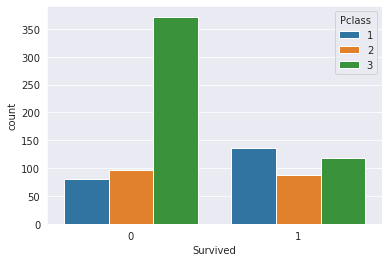

In [24]:
sns.countplot(data=df_train, x='Survived', hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

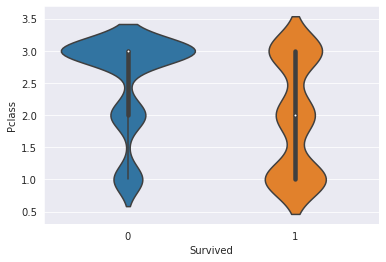

In [25]:
sns.violinplot(data=df_train, x='Survived', y='Pclass')

<AxesSubplot:ylabel='Age'>

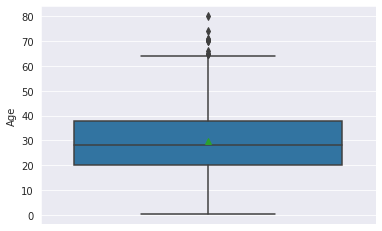

In [26]:
sns.boxplot(data=df_train, y='Age', showmeans=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

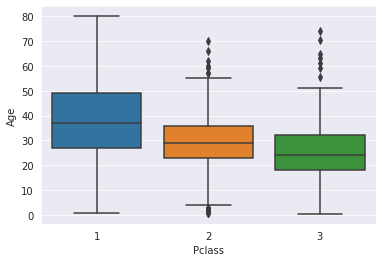

In [27]:
sns.boxplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

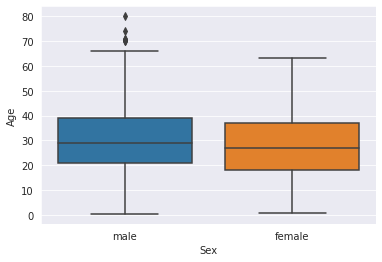

In [28]:
sns.boxplot(data=df_train, x='Sex', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

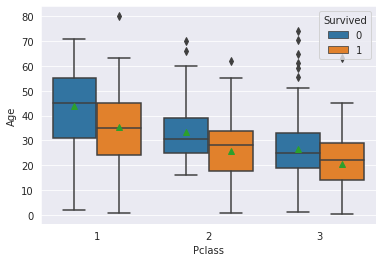

In [29]:
sns.boxplot(data=df_train, x='Pclass', y='Age', hue='Survived', showmeans=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

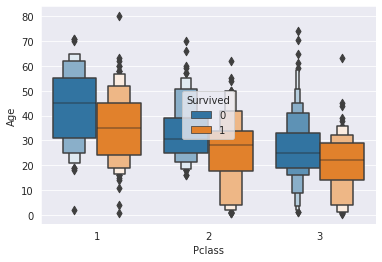

In [30]:
sns.boxenplot(data=df_train, x='Pclass', y='Age', hue='Survived')

In [31]:
df_train.groupby(by='Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [32]:
df_train.groupby(by='Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [33]:
df_train.groupby(by='Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived'>

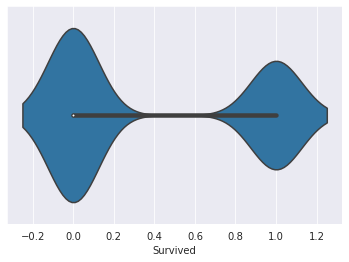

In [34]:
sns.violinplot(data=df_train, x='Survived', hue='Pclass')

<AxesSubplot:xlabel='Survived'>

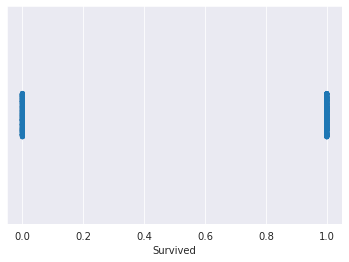

In [35]:
sns.stripplot(data=df_train, x='Survived', hue='Pclass')

In [36]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Count'>

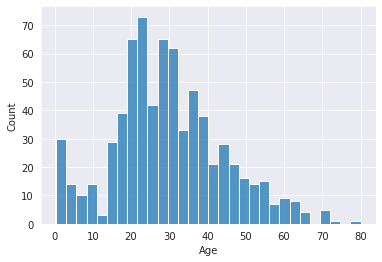

In [37]:
sns.histplot(data=df_train, x='Age', bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

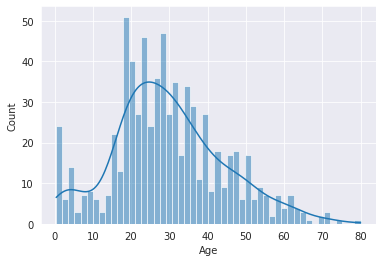

In [38]:
sns.histplot(data=df_train, x='Age', bins=50, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

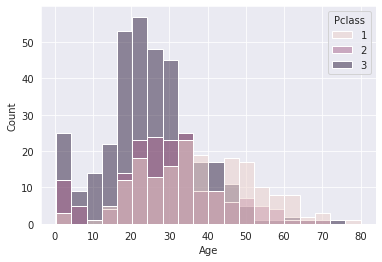

In [39]:
sns.histplot(data=df_train, x='Age', hue='Pclass')

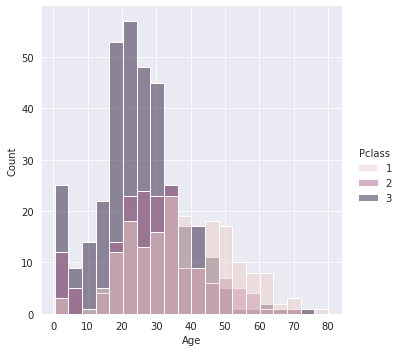

In [40]:
sns.displot(data=df_train, x='Age', hue='Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

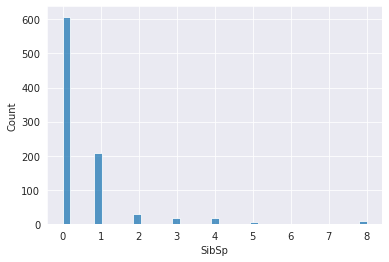

In [41]:
sns.histplot(data=df_train, x='SibSp')

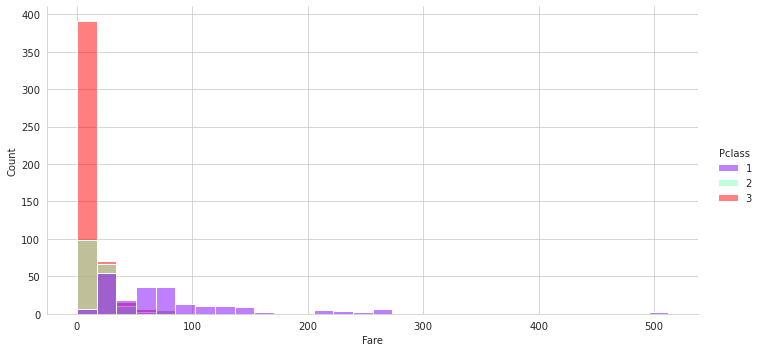

In [42]:
sns.set_style(style='whitegrid')
# plt.figure(figsize=(2, 3))
sns.displot(data=df_train, x='Fare', hue='Pclass', aspect=2, palette='rainbow', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

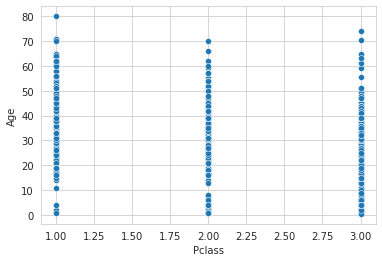

In [43]:
sns.scatterplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

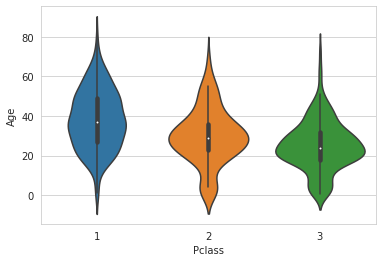

In [44]:
sns.violinplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

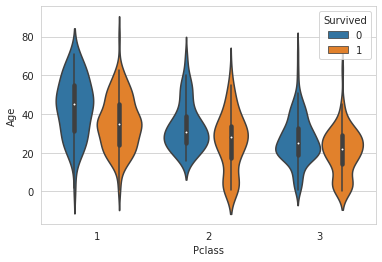

In [45]:
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

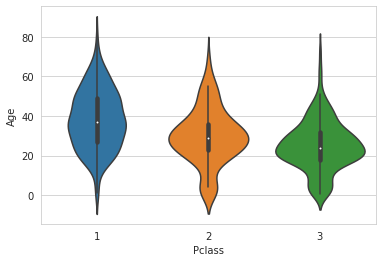

In [46]:
sns.violinplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

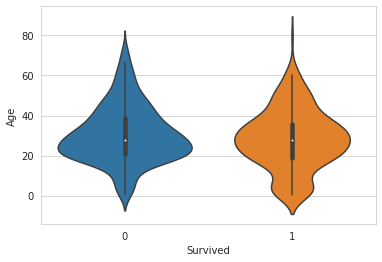

In [47]:
sns.violinplot(data=df_train, x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

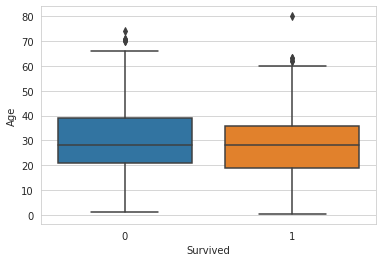

In [48]:
sns.boxplot(data=df_train, x='Survived', y='Age')

<AxesSubplot:ylabel='PassengerId'>

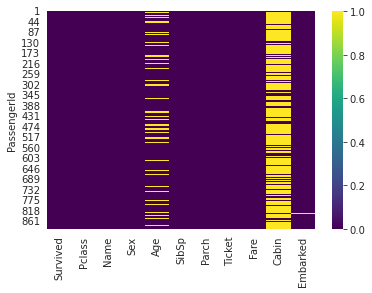

In [49]:
sns.heatmap(df_train.isna(), cmap='viridis')

In [50]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [51]:
df_train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [52]:
df_train['Age'][df_train['Pclass']==2].mean()

29.87763005780347

In [53]:
df_train['Age'][df_train['Pclass']==1].mean()

38.233440860215055

In [54]:
df_train['Age'][df_train['Pclass']==3].mean()

25.14061971830986

In [55]:
pd.DataFrame(df_train.groupby('Pclass')['Age'].mean())

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [56]:
df_train['Age'] = df_train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [57]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

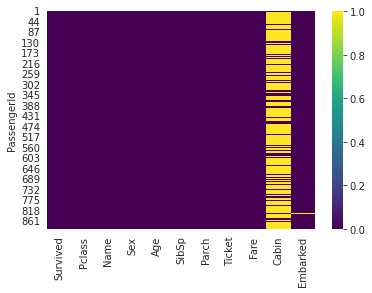

In [58]:
sns.heatmap(df_train.isna(), cmap='viridis')

In [59]:
df_train.drop('Cabin', inplace=True, axis=1)

In [60]:
df_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [61]:
df_train.dropna(inplace=True, axis=0)

In [62]:
df_train.isna().shape

(889, 10)

In [63]:
df_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [64]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

## Categorical to Dummy/Indicator variable

In [65]:
df_train.shape

(889, 10)

In [66]:
df_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
81,0,3,"Waelens, Mr. Achille",male,22.000000,0,0,345767,9.00,S
346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.000000,0,0,248733,13.00,S
143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.000000,1,0,STON/O2. 3101279,15.85,S
304,1,2,"Keane, Miss. Nora A",female,29.877630,0,0,226593,12.35,Q
275,1,3,"Healy, Miss. Hanora ""Nora""",female,25.140620,0,0,370375,7.75,Q
227,1,2,"Mellors, Mr. William John",male,19.000000,0,0,SW/PP 751,10.50,S
583,0,2,"Downton, Mr. William James",male,54.000000,0,0,28403,26.00,S
634,0,1,"Parr, Mr. William Henry Marsh",male,38.233441,0,0,112052,0.00,S
85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.50,S


In [67]:
gender = pd.get_dummies(data=df_train['Sex'], drop_first=True)

In [68]:
gender

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1
...,...
887,1
888,0
889,0


In [69]:
Embarked_ = pd.get_dummies(data=df_train['Embarked'], drop_first=True)
Embarked_

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1
...,...,...
887,0,1
888,0,1
889,0,1


In [70]:
Pclasses = pd.get_dummies(data=df_train['Pclass'], drop_first=False)
Pclasses

,1,2,3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
...,...,...,...
887,0,1,0
888,1,0,0
889,0,0,1


In [71]:
df_train = pd.concat([df_train, gender], axis=1)

In [72]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,0


In [73]:
df_train_2 = df_train.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis=1)

In [74]:
df_train_2.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
PassengerId,,,,,,,
1,0,3,22.00000,1,0,7.2500,1
2,1,1,38.00000,1,0,71.2833,0
3,1,3,26.00000,0,0,7.9250,0
4,1,1,35.00000,1,0,53.1000,0
5,0,3,35.00000,0,0,8.0500,1
6,0,3,25.14062,0,0,8.4583,1
7,0,1,54.00000,0,0,51.8625,1
8,0,3,2.00000,3,1,21.0750,1
9,1,3,27.00000,0,2,11.1333,0


## Logistic regression

### Training

In [74]:
from sklearn.model_selection import train_test_split

In [223]:
X = df_train_2.drop('Survived', axis=1)
y = df_train_2['Survived']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [225]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [226]:
X_train.shape

(595, 6)

In [227]:
X_test.shape

(294, 6)

In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
lr = LogisticRegression()

In [230]:
lr.fit(X_train, y_train)

LogisticRegression()

In [231]:
y_train_pred = lr.predict(X_train)

In [232]:
y_pred = lr.predict(X_test)

In [233]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [234]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [235]:
from sklearn.metrics import confusion_matrix, classification_report

In [236]:
confusion_matrix(y_train, y_train_pred)

array([[317,  48],
       [ 74, 156]])

In [237]:
pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.810742,0.764706,0.794958,0.787724,0.792946
recall,0.868493,0.678261,0.794958,0.773377,0.794958
f1-score,0.838624,0.718894,0.794958,0.778759,0.792342
support,365.000000,230.000000,0.794958,595.000000,595.000000


### Testing

In [238]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.854054,0.761468,0.819728,0.807761,0.819413
recall,0.858696,0.754545,0.819728,0.806621,0.819728
f1-score,0.856369,0.757991,0.819728,0.807180,0.819561
support,184.000000,110.000000,0.819728,294.000000,294.000000


In [239]:
confusion_matrix(y_train, y_train_pred)

array([[317,  48],
       [ 74, 156]])

In [240]:
confusion_matrix(y_test, y_pred)

array([[158,  26],
       [ 27,  83]])

## Decision Trees

### Training

In [241]:
from sklearn.tree import DecisionTreeClassifier

In [242]:
dtree = DecisionTreeClassifier()

In [243]:
dtree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [244]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [245]:
y_train_pred_dtree = dtree.predict(X_train)

In [246]:
confusion_matrix(y_train, y_train_pred_dtree)

array([[364,   1],
       [  5, 225]])

In [247]:
pd.DataFrame(classification_report(y_train, y_train_pred_dtree, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.986450,0.995575,0.989916,0.991013,0.989977
recall,0.997260,0.978261,0.989916,0.987761,0.989916
f1-score,0.991826,0.986842,0.989916,0.989334,0.989899
support,365.000000,230.000000,0.989916,595.000000,595.000000


### Visualizing Trees

In [248]:
from sklearn import tree
text_representation = tree.export_text(dtree)

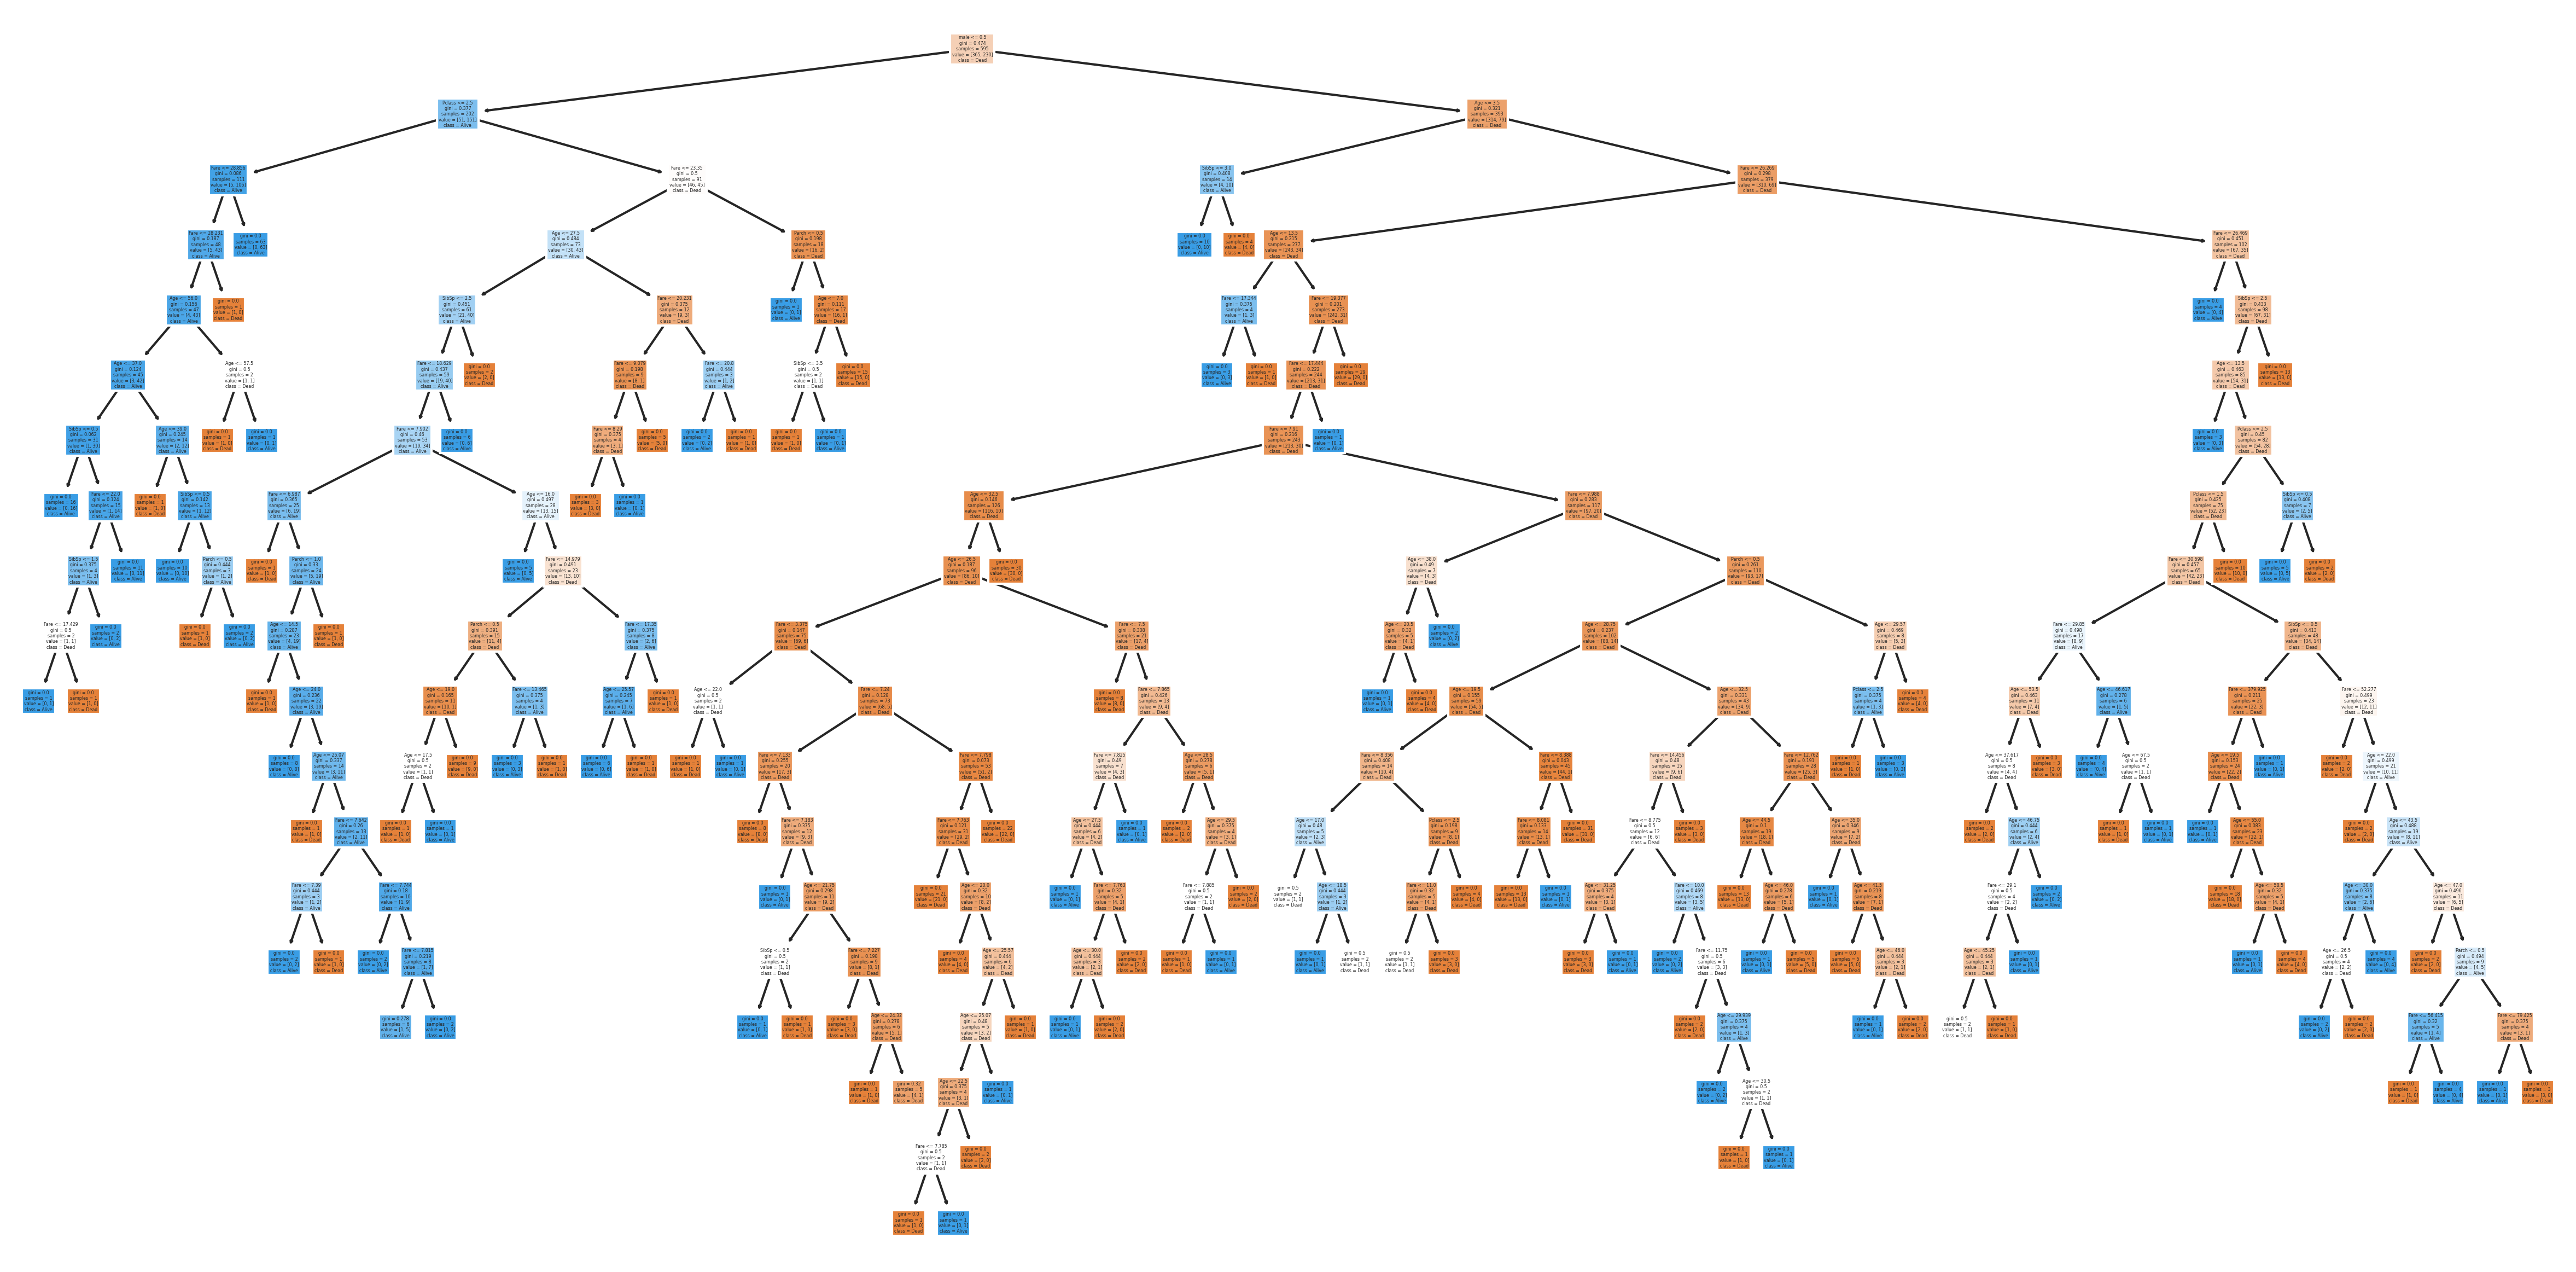

In [249]:
fig = plt.figure(figsize=(20,10), dpi=300)
tree_plot = tree.plot_tree(dtree, max_depth=None, feature_names=X_train.columns.to_list(), filled=True, class_names=['Dead', 'Alive'])

In [250]:
fig.savefig("decistion_tree.png", dpi=300)

### Testing

In [251]:
y_test_pred_dtree = dtree.predict(X_test)

In [252]:
confusion_matrix(y_test, y_test_pred_dtree)

array([[148,  36],
       [ 35,  75]])

In [253]:
pd.DataFrame(classification_report(y_test, y_test_pred_dtree, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.808743,0.675676,0.758503,0.742209,0.758956
recall,0.804348,0.681818,0.758503,0.743083,0.758503
f1-score,0.806540,0.678733,0.758503,0.742636,0.758721
support,184.000000,110.000000,0.758503,294.000000,294.000000


## Random forest

Bagging = Bootstrapping + Aggregating


n_features = sqrt(total features)

### Training

In [254]:
from sklearn.ensemble import RandomForestClassifier

In [255]:
rfc = RandomForestClassifier()

In [256]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [257]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [258]:
y_train_pred_rfc = rfc.predict(X_train)

In [259]:
confusion_matrix(y_train, y_train_pred_rfc)

array([[363,   2],
       [  4, 226]])

In [260]:
pd.DataFrame(classification_report(y_train, y_train_pred_rfc, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.989101,0.991228,0.989916,0.990164,0.989923
recall,0.994521,0.982609,0.989916,0.988565,0.989916
f1-score,0.991803,0.986900,0.989916,0.989351,0.989908
support,365.000000,230.000000,0.989916,595.000000,595.000000


### Testing

In [261]:
y_test_pred_rfc = rfc.predict(X_test)

In [262]:
confusion_matrix(y_test, y_test_pred_rfc)

array([[152,  32],
       [ 30,  80]])

In [263]:
pd.DataFrame(classification_report(y_test, y_test_pred_rfc, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.835165,0.714286,0.789116,0.774725,0.789938
recall,0.826087,0.727273,0.789116,0.776680,0.789116
f1-score,0.830601,0.720721,0.789116,0.775661,0.789489
support,184.000000,110.000000,0.789116,294.000000,294.000000


### Hyperparameter optimization (GridSearchCV)

In [264]:
list(range(4, 16, 2))

[4, 6, 8, 10, 12, 14]

In [265]:
from sklearn.model_selection import GridSearchCV

In [266]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [267]:
from sklearn.model_selection import RandomizedSearchCV

In [273]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(4, 16, 2)), 'max_features': list(range(1, 6))}]
rf_grid = GridSearchCV(rfc, param_grid=forest_params, cv = 5, scoring='accuracy', verbose=2)

### Training

In [274]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ........................max_depth=4, max_features=1; total time=   0.2s
[CV] END ........................max_depth=4, max_features=1; total time=   0.2s
[CV] END ........................max_depth=4, max_features=1; total time=   0.2s
[CV] END ........................max_depth=4, max_features=1; total time=   0.2s
[CV] END ........................max_depth=4, max_features=1; total time=   0.2s
[CV] END ........................max_depth=4, max_features=2; total time=   0.2s
[CV] END ........................max_depth=4, max_features=2; total time=   0.3s
[CV] END ........................max_depth=4, max_features=2; total time=   0.2s
[CV] END ........................max_depth=4, max_features=2; total time=   0.2s
[CV] END ........................max_depth=4, max_features=2; total time=   0.2s
[CV] END ........................max_depth=4, max_features=3; total time=   0.2s
[CV] END ........................max_depth=4, m

[CV] END .......................max_depth=12, max_features=1; total time=   0.2s
[CV] END .......................max_depth=12, max_features=1; total time=   0.2s
[CV] END .......................max_depth=12, max_features=1; total time=   0.2s
[CV] END .......................max_depth=12, max_features=2; total time=   0.2s
[CV] END .......................max_depth=12, max_features=2; total time=   0.2s
[CV] END .......................max_depth=12, max_features=2; total time=   0.2s
[CV] END .......................max_depth=12, max_features=2; total time=   0.2s
[CV] END .......................max_depth=12, max_features=2; total time=   0.2s
[CV] END .......................max_depth=12, max_features=3; total time=   0.3s
[CV] END .......................max_depth=12, max_features=3; total time=   0.3s
[CV] END .......................max_depth=12, max_features=3; total time=   0.2s
[CV] END .......................max_depth=12, max_features=3; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [4, 6, 8, 10, 12, 14],
                          'max_features': [1, 2, 3, 4, 5]}],
             scoring='accuracy', verbose=2)

In [275]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 8, 'max_features': 5}
0.8369747899159664


In [276]:
y_train_pred_rfc_gs = rf_grid.predict(X_train)

In [277]:
confusion_matrix(y_train, y_train_pred_rfc_gs)

array([[362,   3],
       [ 38, 192]])

In [278]:
pd.DataFrame(classification_report(y_train, y_train_pred_rfc_gs, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.905000,0.984615,0.931092,0.944808,0.935776
recall,0.991781,0.834783,0.931092,0.913282,0.931092
f1-score,0.946405,0.903529,0.931092,0.924967,0.929831
support,365.000000,230.000000,0.931092,595.000000,595.000000


### Testing

In [279]:
y_train_pred_rfc_gs = rf_grid.predict(X_test)

In [280]:
confusion_matrix(y_test, y_train_pred_rfc_gs)

array([[168,  16],
       [ 29,  81]])

In [281]:
pd.DataFrame(classification_report(y_test, y_train_pred_rfc_gs, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.852792,0.835052,0.846939,0.843922,0.846154
recall,0.913043,0.736364,0.846939,0.824704,0.846939
f1-score,0.881890,0.782609,0.846939,0.832249,0.844744
support,184.000000,110.000000,0.846939,294.000000,294.000000


## Support Vector Machines

### Training

In [282]:
from sklearn.svm import SVC

In [283]:
svc = SVC()

In [284]:
svc.fit(X_train, y_train)

SVC()

In [285]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [286]:
y_train_pred_svc = svc.predict(X_train)

In [287]:
confusion_matrix(y_train, y_train_pred_svc)

array([[337,  28],
       [163,  67]])

In [288]:
pd.DataFrame(classification_report(y_train, y_train_pred_svc, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.674000,0.705263,0.678992,0.689632,0.686085
recall,0.923288,0.291304,0.678992,0.607296,0.678992
f1-score,0.779191,0.412308,0.678992,0.595749,0.637370
support,365.000000,230.000000,0.678992,595.000000,595.000000


### Hyperparameter optimization (GridSearchCV)

In [289]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [290]:
svc_params = [{'C': [0.1, 1, 10, 100, 1000, 5000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}]
svc_grid = GridSearchCV(svc, param_grid=svc_params, cv = 5, scoring='accuracy', verbose=2)

In [291]:
svc_grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000, 5000, 10000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=2)

In [292]:
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.1s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.1s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END ................................C=1000, gamma=0.001; total time=   0.1s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000, 5000, 10000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=2)

In [293]:
svc_grid.best_params_

{'C': 10000, 'gamma': 0.0001}

In [294]:
svc_grid.best_score_

0.8067226890756303

In [295]:
svc_grid.best_estimator_

SVC(C=10000, gamma=0.0001)

In [296]:
y_train_pred_svc_gs = svc_grid.predict(X_train)

In [297]:
confusion_matrix(y_train, y_train_pred_svc_gs)

array([[322,  43],
       [ 59, 171]])

In [298]:
pd.DataFrame(classification_report(y_train, y_train_pred_svc_gs, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.845144,0.799065,0.828571,0.822105,0.827332
recall,0.882192,0.743478,0.828571,0.812835,0.828571
f1-score,0.863271,0.770270,0.828571,0.816771,0.827321
support,365.000000,230.000000,0.828571,595.000000,595.000000


### Testing

In [299]:
y_test_pred_svc_gs = svc_grid.predict(X_test)

In [300]:
confusion_matrix(y_test, y_test_pred_svc_gs)

array([[157,  27],
       [ 27,  83]])

In [301]:
pd.DataFrame(classification_report(y_test, y_test_pred_svc_gs, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.853261,0.754545,0.816327,0.803903,0.816327
recall,0.853261,0.754545,0.816327,0.803903,0.816327
f1-score,0.853261,0.754545,0.816327,0.803903,0.816327
support,184.000000,110.000000,0.816327,294.000000,294.000000


# Artificial Neural Networks and Deep Learning

Neural Network Single Neuron: 
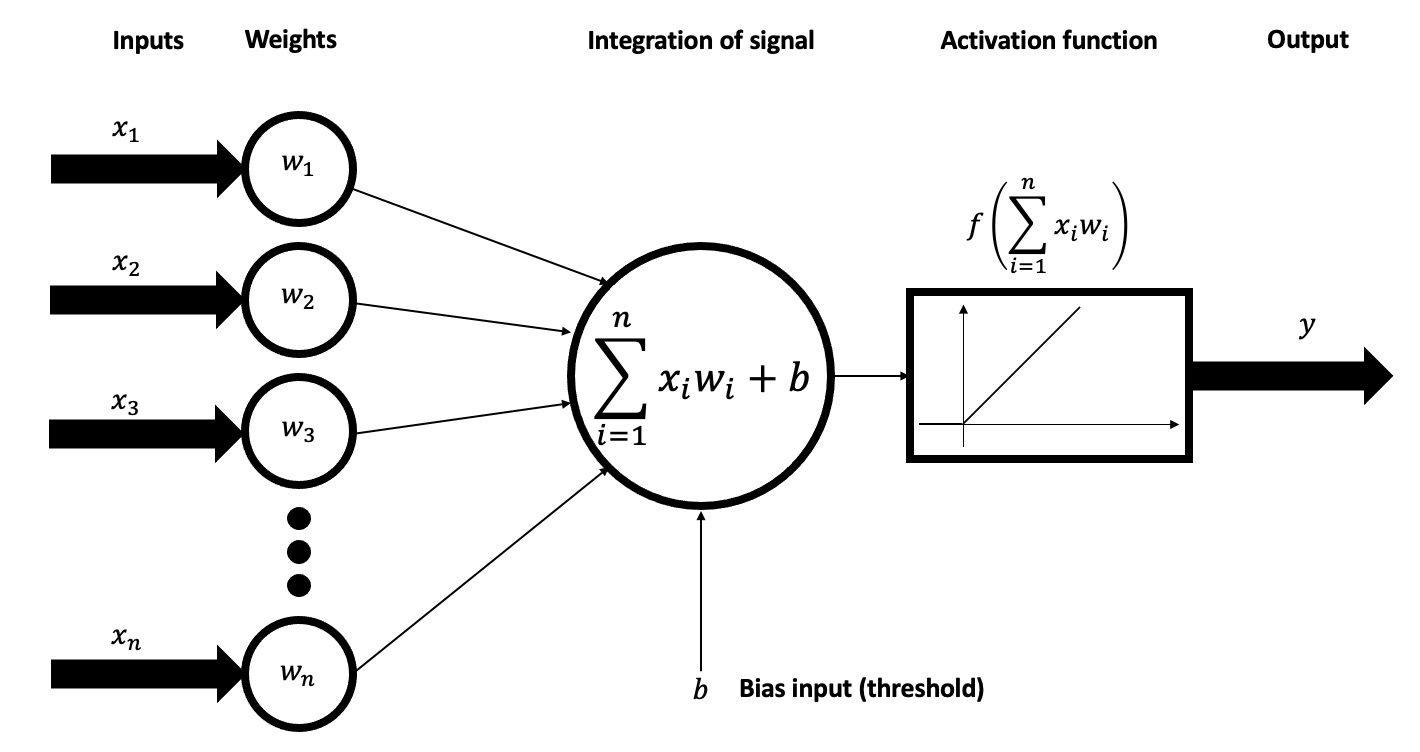

Activation functions: https://en.wikipedia.org/wiki/Activation_function
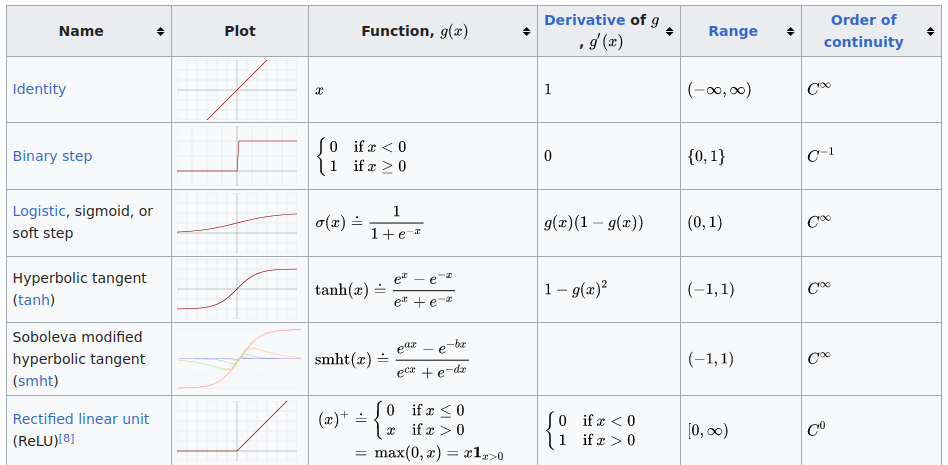

Neural Network example: multiple neurons connected 
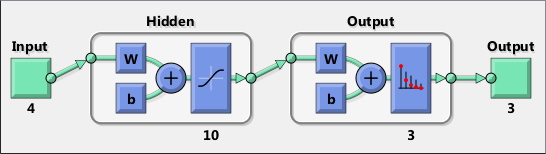

ANN architecture: 
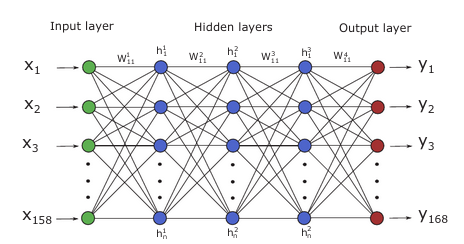

Backpropagation: 
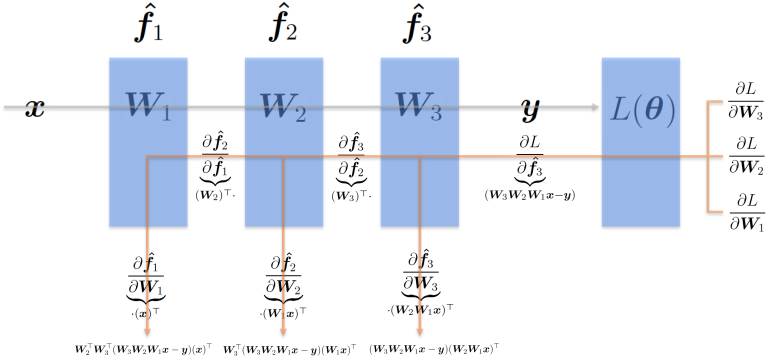

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df_train_2.drop('Survived', axis=1)
y = df_train_2['Survived']

In [77]:
X = X.values
y = y.values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train = scaler.fit_transform(X_train)

In [82]:
X_test = scaler.transform(X_test)

In [83]:
X_train.shape

(595, 6)

In [84]:
X_train.max()

1.0

In [85]:
X_train.min()

0.0

## Tensorflow

In [110]:
import tensorflow as tf

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [112]:
X_train.shape

(595, 6)

In [113]:
model = Sequential()

In [114]:
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [141]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [142]:
model

In [143]:
model.input_shape

(None, 6)

In [144]:
model.output_shape

(None, 1)

In [145]:
model.layers

In [164]:
# This builds the model for the first time:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.4329 - accuracy: 0.8185 - val_loss: 0.4185 - val_accuracy: 0.8265
Epoch 2/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4330 - accuracy: 0.8185 - val_loss: 0.4185 - val_accuracy: 0.8265
Epoch 3/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4327 - accuracy: 0.8202 - val_loss: 0.4178 - val_accuracy: 0.8265
Epoch 4/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4328 - accuracy: 0.8202 - val_loss: 0.4167 - val_accuracy: 0.8265
Epoch 5/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4327 - accuracy: 0.8218 - val_loss: 0.4162 - val_accuracy: 0.8265
Epoch 6/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4328 - accuracy: 0.8185 - val_loss: 0.4160 - val_accuracy: 0.8265
Epoch 7/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4326 - accuracy: 0.8202 - val_loss: 0.4159 - val_accuracy: 0.8265
Epoch 8/1000


Epoch 59/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4304 - accuracy: 0.8252 - val_loss: 0.4157 - val_accuracy: 0.8265
Epoch 60/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.4303 - accuracy: 0.8235 - val_loss: 0.4152 - val_accuracy: 0.8299
Epoch 61/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4303 - accuracy: 0.8235 - val_loss: 0.4149 - val_accuracy: 0.8299
Epoch 62/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4302 - accuracy: 0.8235 - val_loss: 0.4147 - val_accuracy: 0.8299
Epoch 63/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4303 - accuracy: 0.8218 - val_loss: 0.4144 - val_accuracy: 0.8299
Epoch 64/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4303 - accuracy: 0.8218 - val_loss: 0.4145 - val_accuracy: 0.8299
Epoch 65/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4303 - accuracy: 0.8235 - val_loss: 0.4150 - val_accuracy: 0.8299
Epoch 

5/5 [==============================] - 0s 13ms/step - loss: 0.4283 - accuracy: 0.8252 - val_loss: 0.4155 - val_accuracy: 0.8265
Epoch 117/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4282 - accuracy: 0.8252 - val_loss: 0.4153 - val_accuracy: 0.8265
Epoch 118/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.4282 - accuracy: 0.8269 - val_loss: 0.4153 - val_accuracy: 0.8265
Epoch 119/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4281 - accuracy: 0.8269 - val_loss: 0.4149 - val_accuracy: 0.8265
Epoch 120/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4281 - accuracy: 0.8269 - val_loss: 0.4150 - val_accuracy: 0.8265
Epoch 121/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4280 - accuracy: 0.8269 - val_loss: 0.4151 - val_accuracy: 0.8265
Epoch 122/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4281 - accuracy: 0.8269 - val_loss: 0.4147 - val_accuracy: 0.8265
Epoch 123/1000

5/5 [==============================] - 0s 12ms/step - loss: 0.4265 - accuracy: 0.8269 - val_loss: 0.4147 - val_accuracy: 0.8265
Epoch 174/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4267 - accuracy: 0.8252 - val_loss: 0.4152 - val_accuracy: 0.8231
Epoch 175/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4264 - accuracy: 0.8252 - val_loss: 0.4151 - val_accuracy: 0.8231
Epoch 176/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4264 - accuracy: 0.8252 - val_loss: 0.4150 - val_accuracy: 0.8231
Epoch 177/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4264 - accuracy: 0.8269 - val_loss: 0.4150 - val_accuracy: 0.8231
Epoch 178/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4264 - accuracy: 0.8269 - val_loss: 0.4148 - val_accuracy: 0.8231
Epoch 179/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4263 - accuracy: 0.8269 - val_loss: 0.4148 - val_accuracy: 0.8231
Epoch 180/1000

5/5 [==============================] - 0s 12ms/step - loss: 0.4252 - accuracy: 0.8269 - val_loss: 0.4156 - val_accuracy: 0.8265
Epoch 231/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4252 - accuracy: 0.8269 - val_loss: 0.4153 - val_accuracy: 0.8265
Epoch 232/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4251 - accuracy: 0.8269 - val_loss: 0.4152 - val_accuracy: 0.8265
Epoch 233/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4251 - accuracy: 0.8269 - val_loss: 0.4154 - val_accuracy: 0.8265
Epoch 234/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4250 - accuracy: 0.8269 - val_loss: 0.4155 - val_accuracy: 0.8265
Epoch 235/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4250 - accuracy: 0.8269 - val_loss: 0.4156 - val_accuracy: 0.8265
Epoch 236/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4250 - accuracy: 0.8269 - val_loss: 0.4157 - val_accuracy: 0.8265
Epoch 237/1000

5/5 [==============================] - 0s 14ms/step - loss: 0.4240 - accuracy: 0.8269 - val_loss: 0.4149 - val_accuracy: 0.8265
Epoch 288/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4240 - accuracy: 0.8269 - val_loss: 0.4149 - val_accuracy: 0.8265
Epoch 289/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4240 - accuracy: 0.8269 - val_loss: 0.4152 - val_accuracy: 0.8231
Epoch 290/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4241 - accuracy: 0.8286 - val_loss: 0.4160 - val_accuracy: 0.8231
Epoch 291/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4240 - accuracy: 0.8303 - val_loss: 0.4157 - val_accuracy: 0.8231
Epoch 292/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4240 - accuracy: 0.8286 - val_loss: 0.4157 - val_accuracy: 0.8231
Epoch 293/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.4239 - accuracy: 0.8286 - val_loss: 0.4158 - val_accuracy: 0.8231
Epoch 294/1000

5/5 [==============================] - 0s 15ms/step - loss: 0.4228 - accuracy: 0.8286 - val_loss: 0.4145 - val_accuracy: 0.8231
Epoch 345/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4230 - accuracy: 0.8269 - val_loss: 0.4141 - val_accuracy: 0.8231
Epoch 346/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4228 - accuracy: 0.8269 - val_loss: 0.4143 - val_accuracy: 0.8231
Epoch 347/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4231 - accuracy: 0.8269 - val_loss: 0.4150 - val_accuracy: 0.8231
Epoch 348/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4228 - accuracy: 0.8269 - val_loss: 0.4148 - val_accuracy: 0.8231
Epoch 349/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4229 - accuracy: 0.8269 - val_loss: 0.4147 - val_accuracy: 0.8231
Epoch 350/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4228 - accuracy: 0.8286 - val_loss: 0.4153 - val_accuracy: 0.8231
Epoch 351/1000

5/5 [==============================] - 0s 13ms/step - loss: 0.4218 - accuracy: 0.8286 - val_loss: 0.4153 - val_accuracy: 0.8197
Epoch 402/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4217 - accuracy: 0.8286 - val_loss: 0.4156 - val_accuracy: 0.8231
Epoch 403/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4216 - accuracy: 0.8303 - val_loss: 0.4158 - val_accuracy: 0.8231
Epoch 404/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4216 - accuracy: 0.8303 - val_loss: 0.4156 - val_accuracy: 0.8231
Epoch 405/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4217 - accuracy: 0.8303 - val_loss: 0.4155 - val_accuracy: 0.8231
Epoch 406/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4216 - accuracy: 0.8303 - val_loss: 0.4155 - val_accuracy: 0.8231
Epoch 407/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4216 - accuracy: 0.8286 - val_loss: 0.4150 - val_accuracy: 0.8197
Epoch 408/1000

5/5 [==============================] - 0s 13ms/step - loss: 0.4207 - accuracy: 0.8303 - val_loss: 0.4161 - val_accuracy: 0.8197
Epoch 459/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4207 - accuracy: 0.8303 - val_loss: 0.4157 - val_accuracy: 0.8197
Epoch 460/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4209 - accuracy: 0.8269 - val_loss: 0.4154 - val_accuracy: 0.8163
Epoch 461/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4207 - accuracy: 0.8286 - val_loss: 0.4159 - val_accuracy: 0.8197
Epoch 462/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4206 - accuracy: 0.8303 - val_loss: 0.4160 - val_accuracy: 0.8197
Epoch 463/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4206 - accuracy: 0.8303 - val_loss: 0.4158 - val_accuracy: 0.8163
Epoch 464/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4206 - accuracy: 0.8303 - val_loss: 0.4161 - val_accuracy: 0.8163
Epoch 465/1000

5/5 [==============================] - 0s 14ms/step - loss: 0.4200 - accuracy: 0.8286 - val_loss: 0.4175 - val_accuracy: 0.8197
Epoch 516/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4198 - accuracy: 0.8286 - val_loss: 0.4171 - val_accuracy: 0.8163
Epoch 517/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4197 - accuracy: 0.8286 - val_loss: 0.4169 - val_accuracy: 0.8163
Epoch 518/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4199 - accuracy: 0.8269 - val_loss: 0.4163 - val_accuracy: 0.8163
Epoch 519/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4197 - accuracy: 0.8235 - val_loss: 0.4164 - val_accuracy: 0.8163
Epoch 520/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4197 - accuracy: 0.8235 - val_loss: 0.4169 - val_accuracy: 0.8163
Epoch 521/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4198 - accuracy: 0.8252 - val_loss: 0.4165 - val_accuracy: 0.8163
Epoch 522/1000

5/5 [==============================] - 0s 14ms/step - loss: 0.4190 - accuracy: 0.8286 - val_loss: 0.4177 - val_accuracy: 0.8163
Epoch 573/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4191 - accuracy: 0.8269 - val_loss: 0.4181 - val_accuracy: 0.8163
Epoch 574/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.4190 - accuracy: 0.8269 - val_loss: 0.4181 - val_accuracy: 0.8163
Epoch 575/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4191 - accuracy: 0.8269 - val_loss: 0.4176 - val_accuracy: 0.8163
Epoch 576/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4190 - accuracy: 0.8269 - val_loss: 0.4178 - val_accuracy: 0.8163
Epoch 577/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4190 - accuracy: 0.8269 - val_loss: 0.4176 - val_accuracy: 0.8163
Epoch 578/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4190 - accuracy: 0.8286 - val_loss: 0.4177 - val_accuracy: 0.8163
Epoch 579/1000

5/5 [==============================] - 0s 14ms/step - loss: 0.4184 - accuracy: 0.8269 - val_loss: 0.4179 - val_accuracy: 0.8163
Epoch 630/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4185 - accuracy: 0.8269 - val_loss: 0.4187 - val_accuracy: 0.8163
Epoch 631/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4184 - accuracy: 0.8269 - val_loss: 0.4184 - val_accuracy: 0.8163
Epoch 632/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4184 - accuracy: 0.8252 - val_loss: 0.4180 - val_accuracy: 0.8163
Epoch 633/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4184 - accuracy: 0.8252 - val_loss: 0.4177 - val_accuracy: 0.8163
Epoch 634/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4186 - accuracy: 0.8252 - val_loss: 0.4182 - val_accuracy: 0.8163
Epoch 635/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4183 - accuracy: 0.8269 - val_loss: 0.4178 - val_accuracy: 0.8163
Epoch 636/1000

5/5 [==============================] - 0s 15ms/step - loss: 0.4179 - accuracy: 0.8252 - val_loss: 0.4188 - val_accuracy: 0.8163
Epoch 687/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4178 - accuracy: 0.8252 - val_loss: 0.4183 - val_accuracy: 0.8163
Epoch 688/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4178 - accuracy: 0.8252 - val_loss: 0.4182 - val_accuracy: 0.8163
Epoch 689/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4178 - accuracy: 0.8252 - val_loss: 0.4183 - val_accuracy: 0.8163
Epoch 690/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4178 - accuracy: 0.8252 - val_loss: 0.4180 - val_accuracy: 0.8163
Epoch 691/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4178 - accuracy: 0.8252 - val_loss: 0.4179 - val_accuracy: 0.8163
Epoch 692/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4178 - accuracy: 0.8252 - val_loss: 0.4180 - val_accuracy: 0.8163
Epoch 693/1000

5/5 [==============================] - 0s 13ms/step - loss: 0.4174 - accuracy: 0.8269 - val_loss: 0.4174 - val_accuracy: 0.8163
Epoch 744/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4174 - accuracy: 0.8269 - val_loss: 0.4176 - val_accuracy: 0.8163
Epoch 745/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4173 - accuracy: 0.8269 - val_loss: 0.4174 - val_accuracy: 0.8197
Epoch 746/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.4173 - accuracy: 0.8269 - val_loss: 0.4177 - val_accuracy: 0.8163
Epoch 747/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4173 - accuracy: 0.8269 - val_loss: 0.4180 - val_accuracy: 0.8163
Epoch 748/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4173 - accuracy: 0.8269 - val_loss: 0.4180 - val_accuracy: 0.8163
Epoch 749/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4173 - accuracy: 0.8269 - val_loss: 0.4180 - val_accuracy: 0.8163
Epoch 750/1000

5/5 [==============================] - 0s 13ms/step - loss: 0.4169 - accuracy: 0.8269 - val_loss: 0.4194 - val_accuracy: 0.8163
Epoch 801/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4168 - accuracy: 0.8269 - val_loss: 0.4194 - val_accuracy: 0.8163
Epoch 802/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4169 - accuracy: 0.8269 - val_loss: 0.4190 - val_accuracy: 0.8163
Epoch 803/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4168 - accuracy: 0.8269 - val_loss: 0.4190 - val_accuracy: 0.8163
Epoch 804/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4168 - accuracy: 0.8252 - val_loss: 0.4187 - val_accuracy: 0.8163
Epoch 805/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4168 - accuracy: 0.8252 - val_loss: 0.4186 - val_accuracy: 0.8197
Epoch 806/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4168 - accuracy: 0.8252 - val_loss: 0.4185 - val_accuracy: 0.8163
Epoch 807/1000

5/5 [==============================] - 0s 16ms/step - loss: 0.4165 - accuracy: 0.8286 - val_loss: 0.4188 - val_accuracy: 0.8163
Epoch 858/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4165 - accuracy: 0.8286 - val_loss: 0.4188 - val_accuracy: 0.8163
Epoch 859/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4164 - accuracy: 0.8286 - val_loss: 0.4192 - val_accuracy: 0.8163
Epoch 860/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4166 - accuracy: 0.8286 - val_loss: 0.4195 - val_accuracy: 0.8163
Epoch 861/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4167 - accuracy: 0.8269 - val_loss: 0.4205 - val_accuracy: 0.8163
Epoch 862/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4167 - accuracy: 0.8252 - val_loss: 0.4202 - val_accuracy: 0.8163
Epoch 863/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4163 - accuracy: 0.8252 - val_loss: 0.4197 - val_accuracy: 0.8163
Epoch 864/1000

5/5 [==============================] - 0s 14ms/step - loss: 0.4160 - accuracy: 0.8252 - val_loss: 0.4205 - val_accuracy: 0.8163
Epoch 915/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4160 - accuracy: 0.8252 - val_loss: 0.4204 - val_accuracy: 0.8163
Epoch 916/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4163 - accuracy: 0.8252 - val_loss: 0.4208 - val_accuracy: 0.8163
Epoch 917/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4160 - accuracy: 0.8252 - val_loss: 0.4204 - val_accuracy: 0.8163
Epoch 918/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4159 - accuracy: 0.8269 - val_loss: 0.4200 - val_accuracy: 0.8163
Epoch 919/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4160 - accuracy: 0.8269 - val_loss: 0.4193 - val_accuracy: 0.8197
Epoch 920/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4161 - accuracy: 0.8269 - val_loss: 0.4191 - val_accuracy: 0.8197
Epoch 921/1000

5/5 [==============================] - 0s 15ms/step - loss: 0.4162 - accuracy: 0.8269 - val_loss: 0.4202 - val_accuracy: 0.8197
Epoch 972/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4157 - accuracy: 0.8269 - val_loss: 0.4210 - val_accuracy: 0.8197
Epoch 973/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4157 - accuracy: 0.8269 - val_loss: 0.4216 - val_accuracy: 0.8163
Epoch 974/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4158 - accuracy: 0.8252 - val_loss: 0.4220 - val_accuracy: 0.8163
Epoch 975/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4158 - accuracy: 0.8252 - val_loss: 0.4221 - val_accuracy: 0.8163
Epoch 976/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4157 - accuracy: 0.8269 - val_loss: 0.4216 - val_accuracy: 0.8197
Epoch 977/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4158 - accuracy: 0.8269 - val_loss: 0.4217 - val_accuracy: 0.8197
Epoch 978/1000

In [209]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 3)                 21        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
layer = model.layers[0]
layer.get_config()

{'name': 'dense_5',
 'trainable': True,
 'dtype': 'float32',
 'units': 6,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [213]:
model.optimizer.get_config()

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [222]:
model.get_weights() # gives output of each layer's weights and bias

[array([[ 0.49248305,  0.5483126 ,  0.5414696 ,  0.53588265,  0.37835777,
         -0.4979254 ],
        [ 0.89524955,  0.08255064,  0.47359464, -0.7478694 ,  2.540501  ,
         -0.5965913 ],
        [ 1.0153213 ,  0.39510566, -0.9187375 ,  0.4744213 ,  0.9482766 ,
          0.02432567],
        [ 0.12397911,  0.51545197,  0.8216115 ,  1.1737121 ,  0.40840986,
          0.38441125],
        [-0.24942648, -0.43078443,  1.2132083 , -0.6226308 ,  0.2603101 ,
          0.1596218 ],
        [ 0.697461  ,  0.60377526, -0.25863928,  1.0990545 ,  0.06282312,
         -0.51140934]], dtype=float32),
 array([-0.24850012, -0.03493411,  0.25731012,  0.4303751 , -0.2648078 ,
        -0.12571849], dtype=float32),
 array([[-0.67311215,  0.5968688 ,  1.0305486 ],
        [ 0.15576002, -0.40887284,  1.2793581 ],
        [-0.01935156,  0.277945  , -0.38816348],
        [ 1.0081948 , -0.78474367,  0.827803  ],
        [-1.7885947 , -0.77133757,  0.3186971 ],
        [ 0.03406469, -0.36322317, -0.0026828

In [121]:
from tensorflow.keras.utils import plot_model

In [122]:
# plot_model(model)
plot_model(model, to_file='network_architecture.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [165]:
losses = pd.DataFrame(model.history.history)

In [166]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.432908,0.818487,0.418464,0.826531
1,0.433018,0.818487,0.418521,0.826531
2,0.432701,0.820168,0.417771,0.826531
3,0.432808,0.820168,0.416678,0.826531
4,0.432708,0.821849,0.416245,0.826531
...,...,...,...,...
995,0.415681,0.826891,0.420639,0.819728
996,0.415636,0.825210,0.421595,0.819728
997,0.415598,0.825210,0.421780,0.816327
998,0.415890,0.826891,0.421463,0.816327


<AxesSubplot:>

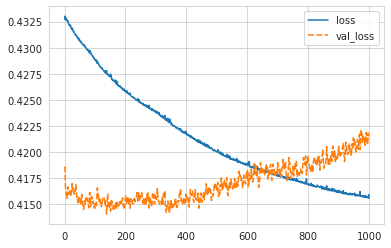

In [167]:
sns.lineplot(data=losses[['loss', 'val_loss']])

In [168]:
from sklearn.metrics import classification_report, confusion_matrix

In [169]:
y_train_prob_nn = model.predict(X_train)

19/19 [==============================] - 0s 2ms/step


In [170]:
y_train_pred_nn = (y_train_prob_nn > 0.5).astype("int32")

In [171]:
y_train_pred_nn

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [172]:
pd.DataFrame(classification_report(y_train, y_train_pred_nn, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.834184,0.812808,0.826891,0.823496,0.825921
recall,0.895890,0.717391,0.826891,0.806641,0.826891
f1-score,0.863937,0.762125,0.826891,0.813031,0.824581
support,365.000000,230.000000,0.826891,595.000000,595.000000


In [173]:
confusion_matrix(y_train, y_train_pred_nn)

array([[327,  38],
       [ 65, 165]])

In [174]:
y_test_prob_nn = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [175]:
y_test_pred_nn = (y_test_prob_nn > 0.5).astype("int32")

In [176]:
pd.DataFrame(classification_report(y_test, y_test_pred_nn, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.850267,0.766355,0.819728,0.808311,0.818872
recall,0.864130,0.745455,0.819728,0.804792,0.819728
f1-score,0.857143,0.755760,0.819728,0.806452,0.819211
support,184.000000,110.000000,0.819728,294.000000,294.000000


In [177]:
confusion_matrix(y_test, y_test_pred_nn)

array([[159,  25],
       [ 28,  82]])

## With EarlyStopping

In [178]:
from tensorflow.keras.callbacks import EarlyStopping

In [179]:
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=2, mode='min')

In [180]:
model_es = Sequential()

In [181]:
model_es.add(Dense(6, activation='relu'))
model_es.add(Dense(3, activation='relu'))
model_es.add(Dense(1, activation='sigmoid'))

In [182]:
model_es.compile(optimizer='adam', loss='binary_crossentropy')

In [184]:
model_es.fit(x=X_train, y=y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
5/5 [==============================] - 1s 46ms/step - loss: 0.6658 - val_loss: 0.6593
Epoch 2/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6638 - val_loss: 0.6568
Epoch 3/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.6614 - val_loss: 0.6519
Epoch 4/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.6572 - val_loss: 0.6459
Epoch 5/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.6517 - val_loss: 0.6398
Epoch 6/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.6463 - val_loss: 0.6341
Epoch 7/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6414 - val_loss: 0.6287
Epoch 8/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6371 - val_loss: 0.6234
Epoch 9/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.6321 - val_loss: 0.6187
Epoch 10/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.6282 - val_loss: 0.6142
Epoch 11/

5/5 [==============================] - 0s 10ms/step - loss: 0.5419 - val_loss: 0.5189
Epoch 84/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5414 - val_loss: 0.5183
Epoch 85/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5408 - val_loss: 0.5176
Epoch 86/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5404 - val_loss: 0.5168
Epoch 87/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5397 - val_loss: 0.5162
Epoch 88/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5393 - val_loss: 0.5157
Epoch 89/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.5388 - val_loss: 0.5152
Epoch 90/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5382 - val_loss: 0.5148
Epoch 91/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5378 - val_loss: 0.5144
Epoch 92/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5373 - val_loss: 0.5139
Epoch 93/1000


5/5 [==============================] - 0s 12ms/step - loss: 0.5096 - val_loss: 0.4847
Epoch 165/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5092 - val_loss: 0.4846
Epoch 166/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5089 - val_loss: 0.4845
Epoch 167/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5086 - val_loss: 0.4843
Epoch 168/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5082 - val_loss: 0.4841
Epoch 169/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5078 - val_loss: 0.4837
Epoch 170/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5075 - val_loss: 0.4835
Epoch 171/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5072 - val_loss: 0.4832
Epoch 172/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5069 - val_loss: 0.4827
Epoch 173/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5066 - val_loss: 0.4824
Epoch

5/5 [==============================] - 0s 11ms/step - loss: 0.4860 - val_loss: 0.4630
Epoch 246/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.4858 - val_loss: 0.4626
Epoch 247/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4855 - val_loss: 0.4624
Epoch 248/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4852 - val_loss: 0.4622
Epoch 249/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4849 - val_loss: 0.4620
Epoch 250/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4847 - val_loss: 0.4619
Epoch 251/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4844 - val_loss: 0.4616
Epoch 252/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4841 - val_loss: 0.4614
Epoch 253/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4838 - val_loss: 0.4613
Epoch 254/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4835 - val_loss: 0.4611
Epoch

5/5 [==============================] - 0s 17ms/step - loss: 0.4654 - val_loss: 0.4468
Epoch 327/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4651 - val_loss: 0.4467
Epoch 328/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4649 - val_loss: 0.4467
Epoch 329/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4646 - val_loss: 0.4466
Epoch 330/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4643 - val_loss: 0.4464
Epoch 331/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4641 - val_loss: 0.4463
Epoch 332/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4638 - val_loss: 0.4462
Epoch 333/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4635 - val_loss: 0.4458
Epoch 334/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4633 - val_loss: 0.4457
Epoch 335/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4630 - val_loss: 0.4456
Epoch

5/5 [==============================] - 0s 15ms/step - loss: 0.4497 - val_loss: 0.4366
Epoch 408/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4496 - val_loss: 0.4363
Epoch 409/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4495 - val_loss: 0.4363
Epoch 410/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4493 - val_loss: 0.4361
Epoch 411/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4492 - val_loss: 0.4362
Epoch 412/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4490 - val_loss: 0.4361
Epoch 413/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4489 - val_loss: 0.4358
Epoch 414/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4488 - val_loss: 0.4357
Epoch 415/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4487 - val_loss: 0.4355
Epoch 416/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4485 - val_loss: 0.4355
Epoch

5/5 [==============================] - 0s 13ms/step - loss: 0.4408 - val_loss: 0.4310
Epoch 489/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4406 - val_loss: 0.4311
Epoch 490/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4405 - val_loss: 0.4312
Epoch 491/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4406 - val_loss: 0.4315
Epoch 492/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4404 - val_loss: 0.4313
Epoch 493/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4404 - val_loss: 0.4308
Epoch 494/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4403 - val_loss: 0.4306
Epoch 495/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4403 - val_loss: 0.4311
Epoch 496/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4401 - val_loss: 0.4313
Epoch 497/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4400 - val_loss: 0.4311
Epoch

5/5 [==============================] - 0s 12ms/step - loss: 0.4348 - val_loss: 0.4278
Epoch 570/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4348 - val_loss: 0.4275
Epoch 571/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4348 - val_loss: 0.4275
Epoch 572/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4346 - val_loss: 0.4273
Epoch 573/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4345 - val_loss: 0.4273
Epoch 574/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4347 - val_loss: 0.4276
Epoch 575/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.4345 - val_loss: 0.4273
Epoch 576/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4344 - val_loss: 0.4271
Epoch 577/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4343 - val_loss: 0.4274
Epoch 578/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.4343 - val_loss: 0.4274
Epoch

In [185]:
losses_es = pd.DataFrame(model_es.history.history)

In [186]:
losses_es

,loss,val_loss
0,0.665761,0.659305
1,0.663805,0.656810
2,0.661357,0.651915
3,0.657173,0.645859
4,0.651739,0.639775
...,...,...
635,0.430175,0.428161
636,0.430045,0.428192
637,0.430012,0.428282
638,0.430249,0.428134


<AxesSubplot:>

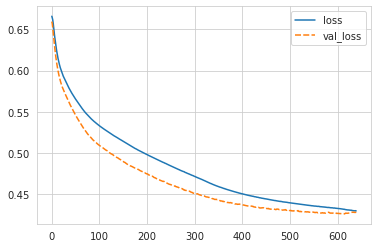

In [187]:
sns.lineplot(data=losses_es[['loss', 'val_loss']])

## Neural Network with dropout layers and EarlyStopping

In [193]:
model_dropout = Sequential()

In [194]:
model_dropout.add(Dense(6, activation='relu'))
model_dropout.add(Dropout(0.4))
# model_dropout.add(Dense(6, activation='relu'))
# model_dropout.add(Dropout(0.4))
model_dropout.add(Dense(3, activation='relu'))
model_dropout.add(Dropout(0.4))
model_dropout.add(Dense(1, activation='sigmoid'))

In [195]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy')

In [196]:
model_dropout.fit(x=X_train, y=y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
5/5 [==============================] - 1s 52ms/step - loss: 0.7271 - val_loss: 0.7241
Epoch 2/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.7348 - val_loss: 0.7200
Epoch 3/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.7096 - val_loss: 0.7158
Epoch 4/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.7133 - val_loss: 0.7119
Epoch 5/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.7039 - val_loss: 0.7082
Epoch 6/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.7128 - val_loss: 0.7048
Epoch 7/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.7114 - val_loss: 0.7009
Epoch 8/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.7042 - val_loss: 0.6950
Epoch 9/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.6953 - val_loss: 0.6882
Epoch 10/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.6915 - val_loss: 0.6813
Epoch 11/

5/5 [==============================] - 0s 13ms/step - loss: 0.5974 - val_loss: 0.5538
Epoch 84/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.6023 - val_loss: 0.5529
Epoch 85/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5907 - val_loss: 0.5517
Epoch 86/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.6025 - val_loss: 0.5506
Epoch 87/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6013 - val_loss: 0.5497
Epoch 88/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5987 - val_loss: 0.5486
Epoch 89/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.6106 - val_loss: 0.5477
Epoch 90/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.6087 - val_loss: 0.5472
Epoch 91/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6103 - val_loss: 0.5470
Epoch 92/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.6114 - val_loss: 0.5465
Epoch 93/1000


5/5 [==============================] - 0s 12ms/step - loss: 0.5918 - val_loss: 0.5117
Epoch 165/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5867 - val_loss: 0.5116
Epoch 166/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5650 - val_loss: 0.5112
Epoch 167/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5816 - val_loss: 0.5108
Epoch 168/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5690 - val_loss: 0.5102
Epoch 169/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5795 - val_loss: 0.5096
Epoch 170/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5802 - val_loss: 0.5094
Epoch 171/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5733 - val_loss: 0.5092
Epoch 172/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5705 - val_loss: 0.5090
Epoch 173/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5705 - val_loss: 0.5085
Epoch

5/5 [==============================] - 0s 13ms/step - loss: 0.5538 - val_loss: 0.4857
Epoch 246/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5597 - val_loss: 0.4851
Epoch 247/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5701 - val_loss: 0.4847
Epoch 248/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5679 - val_loss: 0.4848
Epoch 249/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5646 - val_loss: 0.4850
Epoch 250/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5607 - val_loss: 0.4849
Epoch 251/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5588 - val_loss: 0.4847
Epoch 252/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5913 - val_loss: 0.4846
Epoch 253/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5674 - val_loss: 0.4846
Epoch 254/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5688 - val_loss: 0.4848
Epoch

5/5 [==============================] - 0s 13ms/step - loss: 0.5635 - val_loss: 0.4725
Epoch 327/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5599 - val_loss: 0.4726
Epoch 328/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5595 - val_loss: 0.4727
Epoch 329/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5524 - val_loss: 0.4727
Epoch 330/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5365 - val_loss: 0.4725
Epoch 331/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5543 - val_loss: 0.4723
Epoch 332/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5347 - val_loss: 0.4721
Epoch 333/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5516 - val_loss: 0.4714
Epoch 334/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5474 - val_loss: 0.4710
Epoch 335/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.5580 - val_loss: 0.4706
Epoch

In [197]:
losses_dropout = pd.DataFrame(model_dropout.history.history)

In [198]:
losses_dropout

,loss,val_loss
0,0.727071,0.724093
1,0.734813,0.720008
2,0.709634,0.715806
3,0.713275,0.711893
4,0.703927,0.708247
...,...,...
355,0.560537,0.472711
356,0.578864,0.472779
357,0.556181,0.472466
358,0.546178,0.472154


<AxesSubplot:>

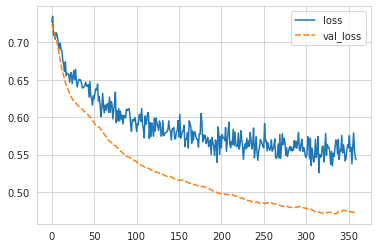

In [199]:
sns.lineplot(data=losses_dropout[['loss', 'val_loss']])

In [200]:
y_train_prob_nn_dropout = model_dropout.predict(X_train)

19/19 [==============================] - 0s 2ms/step


In [201]:
y_train_pred_nn_dropout = (y_train_prob_nn_dropout > 0.5).astype("int32")

In [202]:
y_train_pred_nn_dropout

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [203]:
pd.DataFrame(classification_report(y_train, y_train_pred_nn_dropout, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.773034,0.860000,0.794958,0.816517,0.806651
recall,0.942466,0.560870,0.794958,0.751668,0.794958
f1-score,0.849383,0.678947,0.794958,0.764165,0.783500
support,365.000000,230.000000,0.794958,595.000000,595.000000


In [204]:
confusion_matrix(y_train, y_train_pred_nn_dropout)

array([[344,  21],
       [101, 129]])

In [205]:
y_test_prob_nn_dropout = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [206]:
y_test_pred_nn_dropout = (y_test_prob_nn_dropout > 0.5).astype("int32")

In [207]:
pd.DataFrame(classification_report(y_test, y_test_pred_nn_dropout, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.850267,0.766355,0.819728,0.808311,0.818872
recall,0.864130,0.745455,0.819728,0.804792,0.819728
f1-score,0.857143,0.755760,0.819728,0.806452,0.819211
support,184.000000,110.000000,0.819728,294.000000,294.000000


In [208]:
confusion_matrix(y_test, y_test_pred_nn_dropout)

array([[159,  25],
       [ 28,  82]])